# Polynomial Linear Regression Demo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data import
df=pd.read_csv(r'C:\Sanrusha-Canon Laptop\Udemy\Machine Learning\SampleDataSet\auto-mpg.data',header=None,delimiter='\s+', names=['mpg','cylinders','displacement','horsepower','weight','acceleration','mode year','origin','car name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


##Data Exploration

In [3]:
df.shape

(398, 9)

In [4]:
df=df.drop(df[df.horsepower=="?"].index)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.shape

(392, 9)

In [6]:
df.applymap(np.isreal)

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode year,origin,car name
0,True,True,True,False,True,True,True,True,False
1,True,True,True,False,True,True,True,True,False
2,True,True,True,False,True,True,True,True,False
3,True,True,True,False,True,True,True,True,False
4,True,True,True,False,True,True,True,True,False
5,True,True,True,False,True,True,True,True,False
6,True,True,True,False,True,True,True,True,False
7,True,True,True,False,True,True,True,True,False
8,True,True,True,False,True,True,True,True,False
9,True,True,True,False,True,True,True,True,False


In [7]:
df["horsepower"]=pd.to_numeric(df["horsepower"])

In [8]:
df.applymap(np.isreal)

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode year,origin,car name
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,False
5,True,True,True,True,True,True,True,True,False
6,True,True,True,True,True,True,True,True,False
7,True,True,True,True,True,True,True,True,False
8,True,True,True,True,True,True,True,True,False
9,True,True,True,True,True,True,True,True,False


In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
mode year       0
origin          0
car name        0
dtype: int64

In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
mode year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [11]:
#Variance Inflation Factor (VIF) calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1=df._get_numeric_data()
X=df1.drop(["mpg","origin"],axis=1)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF Factor,features
0,116.0,cylinders
1,86.5,displacement
2,60.3,horsepower
3,137.5,weight
4,69.4,acceleration
5,109.3,mode year


In [12]:
#Variance Inflation Factor (VIF) calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1=df._get_numeric_data()
X=df1.drop(["mpg","origin","weight"],axis=1)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF Factor,features
0,115.1,cylinders
1,67.0,displacement
2,50.1,horsepower
3,55.3,acceleration
4,109.3,mode year


In [13]:
#Variance Inflation Factor (VIF) calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1=df._get_numeric_data()
X=df1.drop(["mpg","origin","weight","cylinders"],axis=1)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF Factor,features
0,23.6,displacement
1,50.1,horsepower
2,54.9,acceleration
3,96.0,mode year


In [14]:
#Variance Inflation Factor (VIF) calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1=df._get_numeric_data()
X=df1.drop(["mpg","origin","weight","cylinders","mode year"],axis=1)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF Factor,features
0,21.5,displacement
1,31.4,horsepower
2,5.1,acceleration


In [15]:
#Variance Inflation Factor (VIF) calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1=df._get_numeric_data()
X=df1.drop(["mpg","origin","weight","cylinders","mode year","horsepower"],axis=1)

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF Factor,features
0,3.1,displacement
1,3.1,acceleration


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


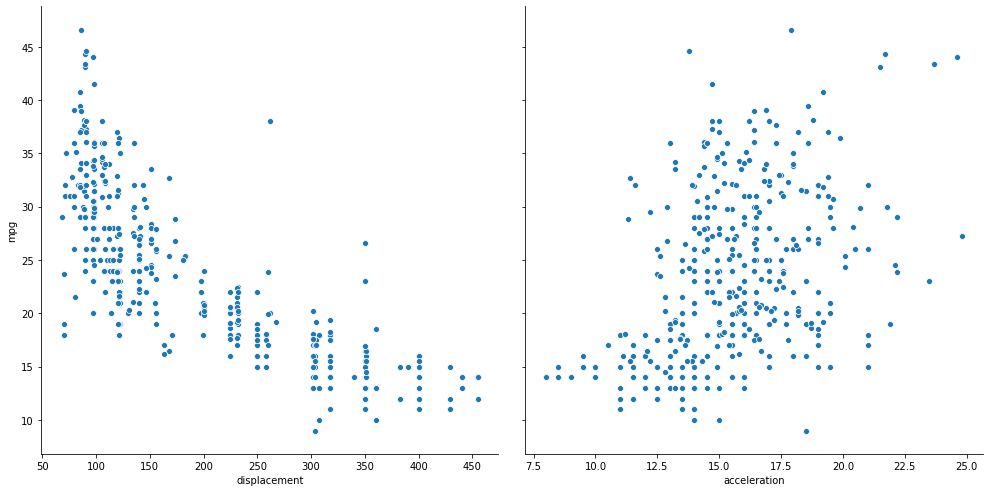

In [16]:
sns.pairplot(df1,x_vars=["displacement","acceleration"], y_vars="mpg",size=7.0)
plt.show()

In [17]:
#Backward Elimination
import statsmodels.api as sm
#y=b0+b1X1+b2X2
#"mpg"=b0+b1*"displacement"+b2*"acceleration"
#"mpg"=b0*1+b1*"displacement"+b2*"acceleration"
y=df["mpg"]
X1=sm.add_constant(X)
#X.head()
regressorOLS=sm.OLS(y,X1).fit()
regressorOLS.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     358.9
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           4.74e-89
Time:                        14:59:30   Log-Likelihood:                -1156.2
No. Observations:                 392   AIC:                             2318.
Df Residuals:                     389   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.1882      1.922     18.828      0.000      32.409      39.967
displacement    -0.0609      0.003    -22.791      0.000      -0.066      -0.056
acceleration    -0.0582      0.101     -0.575      0.566      -0.257       0.141
==============================================================================
Omnibus:                       43.926   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.179
Skew:                           0.725   Prob(JB):                     1.57e-15
Kurtosis:                       4.440   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X1=X1.drop(["acceleration"],axis=1)
regressorOLS=sm.OLS(y,X1).fit()
regressorOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.66e-90
Time:                        14:59:30   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn.model_selection import train_test_split
X=X.drop(["acceleration"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(313, 1) (79, 1) (313,) (79,)


In [20]:
#train the model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#predict y
y_pred=linear_reg.predict(X_test)

In [22]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(15)

,Actual,Predicted
146,28.0,29.684689
282,22.3,26.667660
69,12.0,13.996135
378,38.0,28.779580
331,33.8,29.262305
257,19.4,21.116325
310,38.1,29.745030
328,30.0,26.305616
125,20.0,23.167905
108,20.0,29.262305


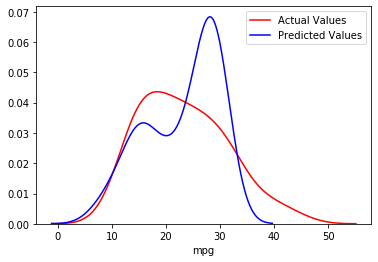

In [23]:
sns.distplot(y_test,color="r",label="Actual Values",hist=False)
sns.distplot(y_pred,color="b",label="Predicted Values",hist=False)
#sns.distplot(y_predpoly,color="g",label="Predicted Values",hist=False)
plt.show()

Text(0, 0.5, 'fuel efficiency')

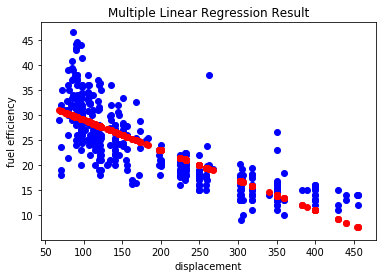

In [24]:
#scatter plot of Multiple Linear Regression Model
plt.scatter(X,y,color="blue")
plt.scatter(X,linear_reg.predict(X),color="red")
plt.title("Multiple Linear Regression Result")
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")

##Polynomial Linear Regression

In [25]:
#Data Preprocessing
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

In [26]:
pd.DataFrame(X_poly).head()
#y=b0*1+b1*X1+b2*X^2

,0,1,2
0,1.0,307.0,94249.0
1,1.0,350.0,122500.0
2,1.0,318.0,101124.0
3,1.0,304.0,92416.0
4,1.0,302.0,91204.0


In [27]:
#Model Fitting
poly.fit(X_poly,y)
lin2=LinearRegression()
lin2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#predict target value
y_poly_pred=lin2.predict(poly.fit_transform(X))

In [29]:
#compare the values
df2 = pd.DataFrame({'Actual': y, 'Predicted': y_poly_pred})
df2.head(15)

,Actual,Predicted
0,18.0,15.594315
1,15.0,14.426097
2,18.0,15.236148
3,16.0,15.699075
4,17.0,15.770601
5,15.0,13.904085
6,14.0,14.177058
7,14.0,13.998240
8,14.0,14.192359
9,15.0,13.898888


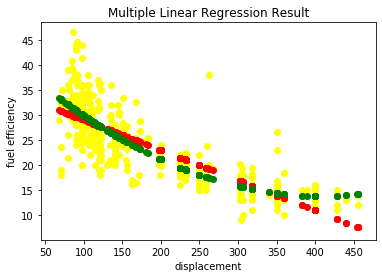

In [31]:
#scatter plot of Multiple Linear Regression Model
plt.scatter(X,y,color="yellow")
plt.scatter(X,linear_reg.predict(X),color="red")
plt.scatter(X,lin2.predict(poly.fit_transform(X)),color="g")
plt.title("Multiple Linear Regression Result")
plt.xlabel("displacement")
plt.ylabel("fuel efficiency")
plt.show()

In [42]:
#Calculating r2 score
#MLR Score
from sklearn import metrics
from sklearn.metrics import r2_score
print('R2 score ', r2_score(y,linear_reg.predict(X)))

R2 score  0.6481521023561414


In [43]:
#Polynomial score
print('R2 score ', r2_score(y,lin2.predict(poly.fit_transform(X))))

R2 score  0.688808733323848
